Steps for Fine-tuning the Model for Cell Surface Protein Imputation:
1.  Prepare Your Environment: Ensure you have the necessary Python libraries installed (as indicated in the original script)
2.  Download Datasets and Pre-trained Model: Obtain the gene and protein expression data files for training and testing, as well as the pre-trained model files
3.  Organize File Paths: Make sure the paths to your data files and the pre-trained model are correctly specified
4.  Execute the Python Script: Run the Python script from your terminal, providing the required parameters to control the fine-tuning process.
5.  Monitor Training (if applicable): If you are training (`--do_train`), observe the output in your terminal to track the progress (loss, learning rate, etc.)
6.  Locate Output Files: After the script finishes, the fine-tuned model, generated feature files and predicted results will be saved in the directory specified by the `--save_dir` parameter (Please download our dataset, fine-tuned models, generated feature files from https://drive.google.com/drive/folders/1vT4mYzU5IPYFrD_rWtksK2DVdn9nsnQH?usp=drive_link)

Python Command to Run Fine-tuning:

python finetune.py --mode train --species human --rna_file /home/jiboya/captain/data/pbmc_gene_train.h5ad --adt_file /home/jiboya/captain/data/pbmc_protein_train.h5ad --save_dir /home/jiboya/captain/results --load_model /home/jiboya/captain/CAPTAIN_PBMC --seed 0 --mask_ratio 0.4 --epochs 100 --batch_size 15 --lr 1e-3

Python Command to cell surface protein imputation:

python finetune.py --mode eval --species human --rna_file /home/jiboya/captain/data/pbmc_gene_test.h5ad --adt_file /home/jiboya/captain/data/pbmc_protein_test.h5ad --save_dir /home/jiboya/captain/results --load_model /home/jiboya/captain/finetuned_model

Explanation of the Command:
`--mode`: Sets the script to training or evaluation mode.

`--species`: Specifies the species of the dataset. Use human or mouse. Default is human.

`--rna_file`: Required. Provides the path to the RNA data file (e.g., rna.h5ad).

`--adt_file`: Required. Provides the path to the ADT (protein expression) data file (e.g., adt.h5ad).

`--save_dir`: Sets the directory where the training results (model checkpoints, logs, etc.) will be saved. Default is /home/jiboya/captain/results.

`--load_model`: Optional. Specifies the path to a directory containing a pre-trained model to load for further training or fine-tuning.

`--seed`: Sets the random seed for reproducibility.

`--mask_ratio`: Defines the ratio of input data to be masked during training (a common technique in self-supervised learning).

`--epochs`: Sets the number of times the entire training dataset will be passed through the model during training.

`--batch_size`: Determines the number of data samples processed together in one batch during training.

`--lr`: Sets the learning rate, controlling the step size during the optimization process.

"Remember to adjust the file paths according to the actual location of your data and pre-trained model. You can also modify other parameters as needed based on your specific requirements."

finetune data - Predicted data shape: (4045, 387)
finetune data - Real data shape: (4045, 387)
finetune data - Protein index: [('CD19', 0), ('CD59', 1), ('CD335', 2), ('CD171', 3), ('SCA1', 4)]
finetune data - Predicted data shape: (4045, 387)
finetune data - Real data shape: (4045, 387)
finetune data - Protein index: [('CD19', 0), ('CD59', 1), ('CD335', 2), ('CD171', 3), ('SCA1', 4)]
finetune data - Predicted data shape: (4045, 387)
finetune data - Real data shape: (4045, 387)
finetune data - Protein index: [('CD19', 0), ('CD59', 1), ('CD335', 2), ('CD171', 3), ('SCA1', 4)]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

finetune data - Predicted data shape: (4045, 387)
finetune data - Real data shape: (4045, 387)
finetune data - Protein index: [('CD19', 0), ('CD59', 1), ('CD335', 2), ('CD171', 3), ('SCA1', 4)]
CD8a Pearson correlation coefficient: 0.9327
Data range: min=-1.52467, max=2.30031
Data range: min=-1.81154, max=2.26358
CD16 Pearson correlation coefficient: 0.9069
Data range: min=-1.46724, max=3.10190
Data range: min=-2.71481, max=3.80312
CD27 Pearson correlation coefficient: 0.9159
Data range: min=-1.64194, max=2.46818
Data range: min=-3.06278, max=2.55101
CD35 Pearson correlation coefficient: 0.9229
Data range: min=-1.77869, max=2.27215
Data range: min=-2.05206, max=3.17215


findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Generic f

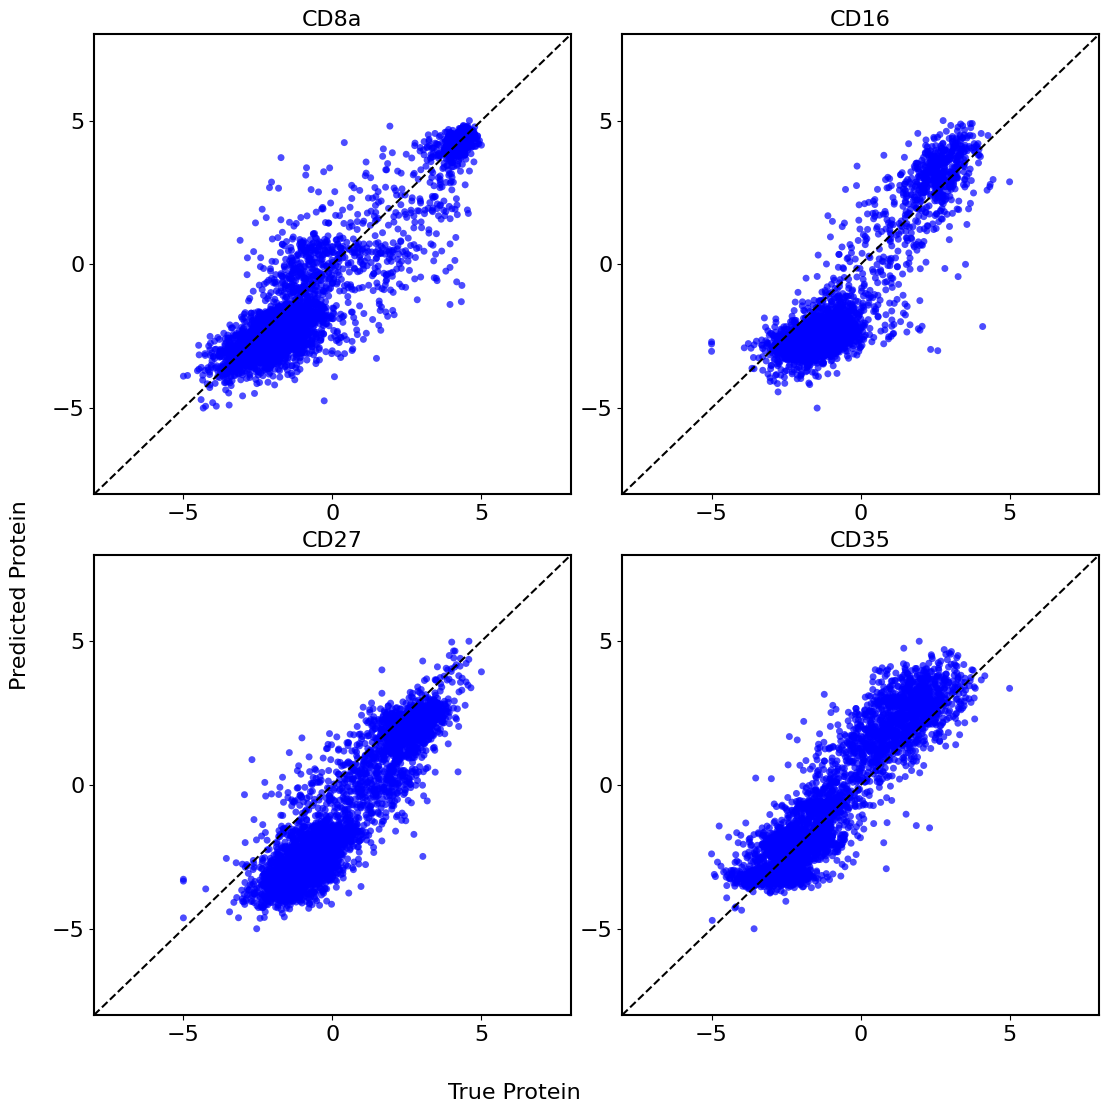

In [2]:
%matplotlib inline
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import pearsonr


try:
    mpl.rcParams['font.family'] = 'sans-serif'
    mpl.rcParams['font.sans-serif'] = ['Helvetica']
    mpl.rcParams['pdf.fonttype'] = 42
    mpl.rcParams['ps.fonttype'] = 42
    mpl.rcParams['axes.titlesize'] = 16
    mpl.rcParams['axes.labelsize'] = 16
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['legend.fontsize'] = 16

except Exception as e:
    print(f"Warning: Error setting fonts: {e}")


captain_data = {
    'pred_file': '/home/jiboya/Captain/protein_prediction/pbmc2pbmc_finetune/predicted_adt_scale.pickle',
    'true_file': '/home/jiboya/Captain/protein_prediction/pbmc2pbmc_finetune/true_adt_data_scale.pickle',
    'token_dict_file': '/home/jiboya/scBLIP/token_dict/adt_token_dict.pickle',
    'save_dir': '/home/jiboya/captain/protein_prediction'
}


protein_names = ['CD8a', 'CD16', 'CD27', 'CD35']


def min_max_scale(data, new_min=-5, new_max=5):
    data = np.array(data)
    if len(data) == 0:
        print("Warning: Data is empty")
        return data
    data_min, data_max = np.min(data), np.max(data)
    print(f"Data range: min={data_min:.5f}, max={data_max:.5f}")
    if data_max == data_min:
        print("Warning: data range is 0, returns an array of all new_min")
        return np.zeros_like(data) + new_min
    scaled = (data - data_min) * (new_max - new_min) / (data_max - data_min) + new_min
    return scaled


def process_captain_data(data_config, protein_name):

    try:
        with open(data_config['pred_file'], 'rb') as fp:
            predicted_adt_data = pkl.load(fp)
        with open(data_config['true_file'], 'rb') as fp:
            true_adt_data = pkl.load(fp)
        with open(data_config['token_dict_file'], 'rb') as fp:
            adt_token_dict = pkl.load(fp)
    except Exception as e:
        print(f"Error reading pickle file: {e}")
        return None, None


    predicted_adt_data = np.array(predicted_adt_data, dtype=float)
    true_adt_data = np.array(true_adt_data, dtype=float)


    print("finetune data - Predicted data shape:", predicted_adt_data.shape)
    print("finetune data - Real data shape:", true_adt_data.shape)
    print("finetune data - Protein index:", list(adt_token_dict.items())[:5])


    def get_protein_vector(protein_name, data_matrix, token_dict):
        try:
            idx = token_dict[protein_name]
            if not isinstance(idx, (int, np.integer)):
                raise ValueError(f"{protein_name} index is not an integer: {idx}")
            if data_matrix.ndim != 2:
                raise ValueError(f"The data matrix must be two-dimensional and the current shape of the {data_matrix.shape}")
            protein_vector = data_matrix[:, idx]
            if np.any(np.isnan(protein_vector)):

                protein_vector = np.nan_to_num(protein_vector, nan=0.0)
            return protein_vector
        except KeyError:

            return None

    pred_protein = get_protein_vector(protein_name, predicted_adt_data, adt_token_dict)
    true_protein = get_protein_vector(protein_name, true_adt_data, adt_token_dict)
    if pred_protein is None or true_protein is None:
        return None, None

    return pred_protein, true_protein


def create_scatter_plots(protein_data, save_dir, dataset_name):

    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten() 

    for idx, (protein_name, (pred_protein, true_protein)) in enumerate(protein_data.items()):

        pearson_corr, _ = pearsonr(true_protein, pred_protein)
        print(f"{protein_name} Pearson correlation coefficient: {pearson_corr:.4f}")


        pred_protein_scaled = min_max_scale(pred_protein)
        true_protein_scaled = min_max_scale(true_protein)


        ax = axes[idx]


        ax.scatter(true_protein_scaled, pred_protein_scaled, color='blue', alpha=0.7, s=25, edgecolor='none')


        ax.plot([-8, 8], [-8, 8], color='black', linestyle='--', linewidth=1.5)


        ax.set_title(protein_name, fontsize=16)


        ax.set_xticks([-5, 0, 5])
        ax.set_yticks([-5, 0, 5])


        ax.set_xlim(-8, 8)
        ax.set_ylim(-8, 8)
        for spine in ax.spines.values():
            spine.set_linewidth(1.5)


        ax.grid(False)


    fig.text(0.5, 0.08, 'True Protein', ha='center', fontsize=16)
    fig.text(0.08, 0.5, 'Predicted Protein', va='center', rotation='vertical', fontsize=16)


    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, left=0.15)  

    


def main():

    protein_data = {}
    for protein_name in protein_names:
        pred_protein, true_protein = process_captain_data(captain_data, protein_name)
        if pred_protein is not None and true_protein is not None:
            protein_data[protein_name] = (pred_protein, true_protein)

    if protein_data:
        create_scatter_plots(protein_data, captain_data['save_dir'], 'finetune')

if __name__ == "__main__":
    main()